<a href="https://colab.research.google.com/github/shahriar1990/Deep_Learning/blob/main/Cat_Vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')


68616192/68606236 [==============================] - 1s 0us/step


In [3]:
train_dir = os.path.join(PATH,'train')
validation_dir = os.path.join(PATH,'validation')

In [11]:
train_dataset = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                            shuffle=True,
                                                            image_size=(150,150),
                                                            batch_size=32,
                                                            seed=42)

Found 2000 files belonging to 2 classes.


In [27]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(directory=validation_dir,
                                                                batch_size=32,
                                                                image_size=(150,150),
                                                                shuffle=True,
                                                                seed=42)

Found 1000 files belonging to 2 classes.


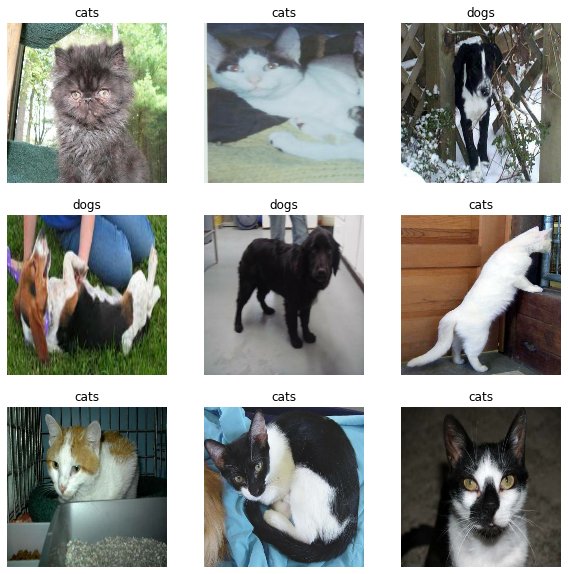

In [9]:
class_names =train_dataset.class_names


plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [26]:
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [28]:
history = model.fit(train_dataset,validation_data=validation_dataset,epochs=5)

Epoch 1/15
63/63 [==============================] - 106s 2s/step - loss: 3.6178 - accuracy: 0.5480 - val_loss: 0.9123 - val_accuracy: 0.5250
Epoch 2/15
63/63 [==============================] - 114s 2s/step - loss: 0.7031 - accuracy: 0.5940 - val_loss: 0.7565 - val_accuracy: 0.5850
Epoch 3/15
63/63 [==============================] - 125s 2s/step - loss: 0.5411 - accuracy: 0.7150 - val_loss: 0.8230 - val_accuracy: 0.5840
Epoch 4/15
63/63 [==============================] - 116s 2s/step - loss: 0.4493 - accuracy: 0.7815 - val_loss: 0.7726 - val_accuracy: 0.6640
Epoch 5/15
63/63 [==============================] - 114s 2s/step - loss: 0.3506 - accuracy: 0.8395 - val_loss: 0.8452 - val_accuracy: 0.6550
Epoch 6/15
63/63 [==============================] - 106s 2s/step - loss: 0.2534 - accuracy: 0.8925 - val_loss: 0.9193 - val_accuracy: 0.6360


KeyboardInterrupt: ignored

In [32]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=7,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


7/7 [==============================] - 19s 3s/step - loss: 0.6878 - accuracy: 0.5786 - val_loss: 0.8855 - val_accuracy: 0.6470
Epoch 2/5
7/7 [==============================] - 19s 3s/step - loss: 0.6865 - accuracy: 0.7214 - val_loss: 0.8644 - val_accuracy: 0.6540
Epoch 3/5
7/7 [==============================] - 19s 3s/step - loss: 0.6863 - accuracy: 0.7643 - val_loss: 0.8619 - val_accuracy: 0.6600
Epoch 4/5
7/7 [==============================] - 19s 3s/step - loss: 0.6843 - accuracy: 0.8714 - val_loss: 0.8664 - val_accuracy: 0.6750
Epoch 5/5
7/7 [==============================] - 19s 3s/step - loss: 0.6832 - accuracy: 0.9000 - val_loss: 0.9556 - val_accuracy: 0.6600


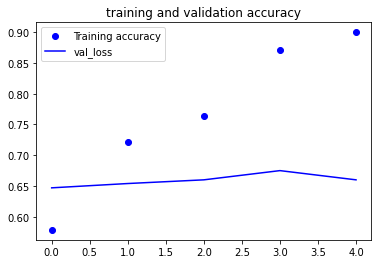

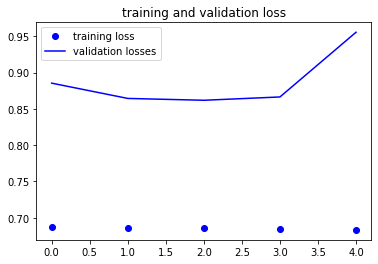

In [43]:
from scipy._lib.doccer import indentcount_lines
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b', label='val_loss')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'training loss')
plt.plot(epochs,val_loss,'b',label = 'validation losses')
plt.title('training and validation loss')
plt.legend()

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'softmax'))
model.add(layers.Dense(1,activation= 'sigmoid'))

model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=7,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
7/7 [==============================] - 10s 1s/step - loss: 0.6932 - accuracy: 0.5214 - val_loss: 0.6933 - val_accuracy: 0.4400
Epoch 2/5
7/7 [==============================] - 14s 2s/step - loss: 0.6933 - accuracy: 0.4143 - val_loss: 0.6932 - val_accuracy: 0.4300
Epoch 3/5
7/7 [==============================] - 12s 2s/step - loss: 0.6932 - accuracy: 0.4786 - val_loss: 0.6931 - val_accuracy: 0.5300
Epoch 4/5
7/7 [==============================] - 10s 1s/step - loss: 0.6931 - accuracy: 0.5143 - val_loss: 0.6931 - val_accuracy: 0.5300
Epoch 5/5
7/7 [==============================] - 12s 2s/step - loss: 0.6932 - accuracy: 0.4929 - val_loss: 0.6932 - val_accuracy: 0.4300


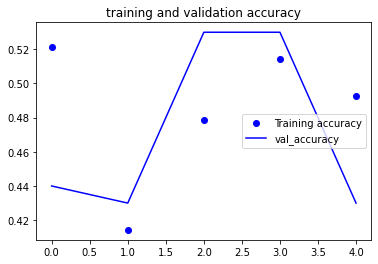

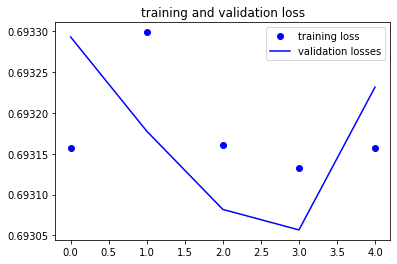

In [53]:
epochs = range(len(acc))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b', label='val_accuracy')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'training loss')
plt.plot(epochs,val_loss,'b',label = 'validation losses')
plt.title('training and validation loss')
plt.legend()